## Diamond Price Prediction 




In [52]:
%pylab inline
%precision 6

Populating the interactive namespace from numpy and matplotlib


'%.6f'

#### Imports

In [53]:
from common.classes.Struct import Struct
from common.feature_transformations import get_one_hot_encoding

In [54]:
import numpy as np
import pandas as pd
from time import time
pd.options.display.max_colwidth=100
np.set_printoptions(linewidth=140,edgeitems=10)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### Paths to Data Files

In [143]:
path = r'./data/'
dataf = path+r'08 - Diamonds.csv'
train = path+r'train.csv'
test = path+r'test.csv'
pred_res_test = path+r'results.csv'

In [121]:
#Read file

data = pd.read_csv(dataf, skipinitialspace=True, sep=',')
data.head(10)

Unnamed: 0  carat        cut color clarity  depth  table  price     x     y     z
0           1   0.23      Ideal     E     SI2   61.5   55.0    NaN  3.95  3.98  2.43
1           2    NaN    Premium     E     SI1   59.8   61.0  326.0  3.89  3.84  2.31
2           3   0.23       Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31
3           4   0.29    Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63
4           5   0.31       Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75
5           6   0.24  Very Good     J    VVS2   62.8   57.0  336.0  3.94  3.96  2.48
6           7   0.24  Very Good     I    VVS1   62.3   57.0  336.0  3.95  3.98  2.47
7           8    NaN  Very Good     H     SI1   61.9   55.0  337.0  4.07  4.11  2.53
8           9   0.22       Fair     E     NaN   65.1   61.0  337.0  3.87  3.78  2.49
9          10   0.23  Very Good     H     VS1   59.4   61.0  338.0  4.00  4.05  2.39

In [122]:
#count

data.isnull().sum()

Unnamed: 0       0
carat         3467
cut           3482
color         1375
clarity       1304
depth         1314
table         1386
price         1318
x                0
y                0
z                0
dtype: int64

In [123]:
len(data)

53940

### First approach - delete missing variables 

In [59]:
# delete all nans except price
miss_val_int=['carat', 'depth', 'table']
miss_val_str=['cut', 'color', 'clarity']


In [100]:
def del_int(val, df):
    
    for i in val:
        df = df[np.isfinite(df[i])]
    return df
        

In [124]:
# test for integers 
data=del_int(miss_val_int,data)

In [125]:
data.isnull().sum()

Unnamed: 0       0
carat            0
cut           3090
color         1217
clarity       1175
depth            0
table            0
price         1178
x                0
y                0
z                0
dtype: int64

In [126]:
len(data)

48004

In [118]:
#delete string nans

def del_str(val, df):
    
    for i in val:
        df2=df.copy()
        print(len(df))
        df[i].fillna('nan', inplace=True)
        #print()
        df = df[~np.equal(df[i],'nan')]
        print(len(df))
        
    return df
        

In [127]:
# test for strings
data=del_str(miss_val_str,data)

48004
44914
44914
43786
43786
42708


/usr/local/lib/python3.5/dist-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [129]:
data.isnull().sum()

Unnamed: 0       0
carat            0
cut              0
color            0
clarity          0
depth            0
table            0
price         1041
x                0
y                0
z                0
dtype: int64

In [130]:
len(data)

42708

### Test file

In our dataset we have empty price columns.
We will use it as test files for prediction (as in Kaggle)

In [131]:
dtest = data[np.isnan(data['price'])]

In [132]:
len(dtest)

1041

In [33]:
len(dtest)

1178

In [8]:
len(dtest)

1318

In [133]:
dtest.head(3)

Unnamed: 0  carat        cut color clarity  depth  table  price     x     y     z
0             1   0.23      Ideal     E     SI2   61.5   55.0    NaN  3.95  3.98  2.43
146         147   0.71  Very Good     G     VS1   63.3   59.0    NaN  5.52  5.61  3.52
158         159   0.73    Premium     G     VS1   61.5   58.0    NaN  5.79  5.75  3.55

In [134]:
dtest.isnull().sum()

Unnamed: 0       0
carat            0
cut              0
color            0
clarity          0
depth            0
table            0
price         1041
x                0
y                0
z                0
dtype: int64

In [135]:
datar = data[np.isfinite(data['price'])]

In [136]:
datar.isnull().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

In [137]:
len(datar)

41667

In [158]:
len(data)

42708

### Save results to files


In [140]:
import csv

In [146]:
# write to file train

datar.to_csv(train)

In [149]:
# write to file test

dtest.to_csv(test)

In [150]:
d=find(dtest)

### Represent categorical data

Use one-hot encoding

In [154]:
F=Struct() # features
F.original = ['cut', 'color', 'clarity']
F.one_hot_major = []

In [155]:
F

{original=['cut', 'color', 'clarity'], one_hot_major=[]}

In [159]:
data2=data.copy()

In [164]:
for col in ['cut', 'color', 'clarity']:   #choise
    print('Making one-hot-encoding of %s' % col)
    one_hot = get_one_hot_encoding(data2[col])
    data2 = pd.concat([data2, one_hot], axis=1)
    F.one_hot_major += list(one_hot.columns)

Making one-hot-encoding of cut
Making one-hot-encoding of color
Making one-hot-encoding of clarity


In [165]:
data2.head(4)

Unnamed: 0  carat      cut color clarity  depth  table  price     x     y     z  cut=Fair  cut=Good  cut=Ideal  cut=Premium  cut=Very Good  color=D  color=E  color=F  color=G  color=H  color=I  color=J  clarity=I1  clarity=IF  clarity=SI1  clarity=SI2  clarity=VS1  clarity=VS2  clarity=VVS1  clarity=VVS2
0           1   0.23    Ideal     E     SI2   61.5   55.0    NaN  3.95  3.98  2.43         0         0          1            0              0        0        1        0        0        0        0        0           0           0            0            1            0            0             0             0
2           3   0.23     Good     E     VS1   56.9   65.0  327.0  4.05  4.07  2.31         0         1          0            0              0        0        1        0        0        0        0        0           0           0            0            0            1            0             0             0
3           4   0.29  Premium     I     VS2   62.4   58.0  334.0  4.20  4.23  2.63         0         0          0            1              0        0        0        0        0        0        1        0           0           0            0            0            0            1             0             0
4           5   0.31     Good     J     SI2   63.3   58.0  335.0  4.34  4.35  2.75         0         1          0            0              0        0        0        0        0        0        0        1           0           0            0            1            0            0             0             0

In [166]:
F.one_hot_major

['cut=Fair',
 'cut=Good',
 'cut=Ideal',
 'cut=Premium',
 'cut=Very Good',
 'color=D',
 'color=E',
 'color=F',
 'color=G',
 'color=H',
 'color=I',
 'color=J',
 'clarity=I1',
 'clarity=IF',
 'clarity=SI1',
 'clarity=SI2',
 'clarity=VS1',
 'clarity=VS2',
 'clarity=VVS1',
 'clarity=VVS2']

In [167]:
a=[11,4,5]
b=[13,5,6]
c=a+b
print(c)

[11, 4, 5, 13, 5, 6]


In [168]:
features = F.one_hot_major + ['carat', 'depth', 'table', 'x', 'y', 'z']


In [203]:
data3=data2.copy()

In [204]:
#split to train and test set
X_data = data3[np.isfinite(data3['price'])]
test=data3[np.isnan(data3['price'])]

In [205]:
#select from data only features
X_data_copy=X_data.copy()
X_data = X_data.loc[:, features]
X_data = X_data.astype(float32)
#price
X_data_price=X_data_copy.loc[:,'price']



test_copy=test.copy()
test = test.loc[:, features]
test = test.astype(float32)
#price
test_price=test_copy.loc[:,'price']



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f130c12beb8>], dtype=object)

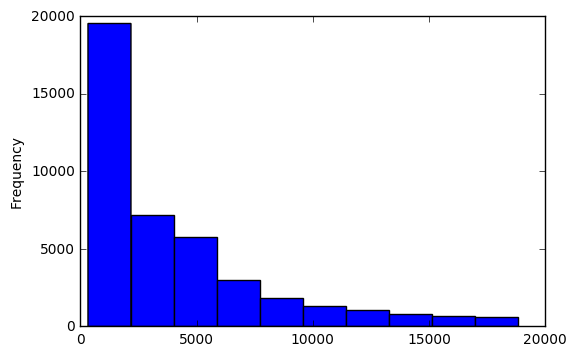

In [274]:
X_data_copy['price'].plot(kind='hist', subplots=True)

In [208]:
X_data_price.head(7)

2     327.0
3     334.0
4     335.0
5     336.0
6     336.0
9     338.0
10    339.0
Name: price, dtype: float64

In [206]:
# do sparse matrix
from scipy import sparse

In [207]:
X_data = sparse.csr_matrix(X_data)
test = sparse.csr_matrix(test)

### Models

We will use RMSE metric as evaluation

In [209]:
#import GrigSearch and KFold - for CrossValidation of regression
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import mean_squared_error # for RMSE calc
from sklearn.cross_validation import train_test_split # fot spliting

In [210]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, X_data_price, test_size=0.33, random_state=42)

kfold = KFold(len(Y_train), n_folds=10, shuffle=True)

In [241]:
#try Linear Regression

from sklearn.linear_model import LinearRegression


lin_reg = LinearRegression(n_jobs=10)
t = time()
lin_reg.fit(X_train, Y_train)
print("Time left %0.2fs" % (time() - t))

Time left 0.09s


In [242]:
lin_reg.score(X_train, Y_train)

0.921475

In [244]:
rmse = math.sqrt(mean_squared_error(Y_test, lin_reg.predict(X_test)))
print("RMSE^ %.4f" % rmse)

RMSE^ 1131.2954


In [238]:
#Linear Regression with normalization



lin_reg = LinearRegression(normalize=True, n_jobs=10)
t = time()
lin_reg.fit(X_train, Y_train)
print("Time left %0.2fs" % (time() - t))

Time left 0.06s


In [239]:
lin_reg.score(X_train, Y_train)

0.921475

In [240]:
rmse = math.sqrt(mean_squared_error(Y_test, lin_reg.predict(X_test)))
print("RMSE^ %.4f" % rmse)

RMSE^ 1131.2954


In [214]:
# Ridge regression
from sklearn.linear_model import Ridge

In [216]:
param = {'alpha': (0.1, 0.2, 0.75, 0.9)}

In [217]:
ridge = Ridge(random_state=300)
ridge = GridSearchCV(ridge, param, n_jobs=15, cv=kfold)
t = time()
ridge.fit(X_train, Y_train)
print("Time left %0.3fs" % (time() - t))

Time left 4.594s


In [218]:
for score in ridge.grid_scores_:
    print (score.mean_validation_score, score.parameters)
ridge.best_score_, ridge.best_params_


0.9209155722697501 {'alpha': 0.1}
0.9209118953617865 {'alpha': 0.2}
0.9208969501611879 {'alpha': 0.75}
0.9208817891824889 {'alpha': 0.9}


(0.920916, {'alpha': 0.100000})

In [219]:
rmse = math.sqrt(mean_squared_error(Y_test, ridge.predict(X_test)))
print("RMSE: %.4f" % rmse)

RMSE: 1133.6911


In [223]:
param = {'alpha': (0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.11, 0.13, 0.15)}
ridge = Ridge(random_state=300)
ridge = GridSearchCV(ridge, param, n_jobs=15, cv=kfold)
t = time()
ridge.fit(X_train, Y_train)
print("Time left %0.3fs" % (time() - t))

Time left 7.039s


In [224]:
for score in ridge.grid_scores_:
    print (score.mean_validation_score, score.parameters)
ridge.best_score_, ridge.best_params_


0.9209167218158281 {'alpha': 0.01}
0.9209172826092878 {'alpha': 0.03}
0.920722216326376 {'alpha': 0.05}
0.9209162835989984 {'alpha': 0.07}
0.9209157829982467 {'alpha': 0.09}
0.9209155324243068 {'alpha': 0.1}
0.9209152816679178 {'alpha': 0.11}
0.9209136639117257 {'alpha': 0.13}
0.9209131595220392 {'alpha': 0.15}


(0.920917, {'alpha': 0.030000})

In [225]:
rmse = math.sqrt(mean_squared_error(Y_test, ridge.predict(X_test)))
print("RMSE: %.4f" % rmse)

RMSE: 1133.6767


In [230]:
# Lasso
from sklearn.linear_model import Lasso



In [234]:
# param = {'alpha': (0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9)}
# lasso = Lasso(random_state=300)
# lasso = GridSearchCV(lasso, param, n_jobs=15, cv=kfold)
# t = time()
# lasso.fit(X_train, Y_train)
# print("Time left %0.3fs" % (time() - t))



In [278]:
for score in lasso.grid_scores_:
    print (score.mean_validation_score, score.parameters)
lasso.best_score_, lasso.best_params_


0.9163410436415143 {'alpha': 0.1}
0.9170483760461532 {'alpha': 0.2}
0.9176960094645392 {'alpha': 0.3}
0.9182878045202075 {'alpha': 0.4}
0.9188217079917198 {'alpha': 0.5}
0.9192980434333894 {'alpha': 0.6}
0.9197179467033895 {'alpha': 0.7}
0.9200803832449879 {'alpha': 0.8}
0.9203865380531773 {'alpha': 0.9}


(0.920387, {'alpha': 0.900000})

In [279]:
rmse = math.sqrt(mean_squared_error(Y_test, lasso.predict(X_test)))
print("RMSE: %.4f" % rmse)

RMSE: 1131.7127


In [245]:
#predict for test using linear regression

#apply model
Y_predicted = ridge.predict(test)



In [251]:
abs(-1)

1

In [254]:
#Replace negatives with abs

for i in range(0, len(Y_predicted)):
    if Y_predicted[i] < 0:
        Y_predicted[i] = abs(Y_predicted[i])

In [259]:
# write to file
f_names=[['Id', 'Price']]

result=[[x,y] for x,y in zip(dtest['Unnamed: 0'],Y_predicted)]

with open(pred_res_test, 'w') as fp:
    a = csv.writer(fp, delimiter=',')
    a.writerows(f_names)
    a.writerows(result)